# Customer Churn Prediction in Telecom Services

In [79]:
# Import modules
import pandas as pd
import numpy as np

#### Loading Dataset

In [80]:
train = pd.read_csv('Train.csv')
accinfo = pd.read_csv('Train_Accountinfo.csv',na_values=['NA','MISSINGVAL'])
demographics = pd.read_csv('Train_Demographics.csv',na_values='?')
services = pd.read_csv('Train_ServicesOptedFor.csv')

#### Dimensions

In [81]:
# Shapes of the data 
print(train.shape)
print(accinfo.shape)
print(demographics.shape)
print(services.shape)

(5298, 2)
(5298, 8)
(5298, 8)
(47682, 3)


From the data, we know that we have CustomerID as PrimaryKey 

In [82]:
# Unique columns in datasets
print(len(train.CustomerID.unique()))
print(len(accinfo.CustomerID.unique()))
print(len(demographics.HouseholdID.unique()))
print(len(services.CustomerID.unique()))

5298
5298
5298
5298


#### Merging the data frames by CustomerID

Merge train dataframe and accinfo dataframe

In [83]:
n1 = pd.merge(train,accinfo,on='CustomerID')

Merge finally updated dataframe and demographics dataframe

In [84]:
# We have HouseholdID in demographics which is CustomerID so renaming the column. 
demographics.columns = ['CustomerID', 'Country', 'State', 'Retired', 'HasPartner',
       'HasDependents', 'Education', 'Gender']

In [85]:
new = pd.merge(n1,demographics,on='CustomerID')

In [86]:
# Dimensions
new.shape

(5298, 16)

Merge finally updated dataframe and services dataframe

In [87]:
# Count - categories 
services.SeviceDetails.value_counts()

No                     17410
Yes                    13390
No internet service     6936
1                       4792
Fiber optic             2313
DSL                     1829
No phone service         506
0                        506
Name: SeviceDetails, dtype: int64

In [88]:
# Changing the attribute types to category
services.SeviceDetails = services.SeviceDetails.astype('category')

Dataframe is in long format, we should make it into wide foramt 

In [89]:
# Label Encoding
services.SeviceDetails = services.SeviceDetails.cat.codes
services.SeviceDetails.value_counts()

4    17410
7    13390
5     6936
1     4792
3     2313
2     1829
6      506
0      506
Name: SeviceDetails, dtype: int64

Now, still we can't merge this to our final data frames since each customer has multiple entries.
So, we'll convert this into a new table with the pivot_table function

In [90]:
# Creating a multilevel index with values as serviceDetails
n = services.pivot_table(index="CustomerID", columns="TypeOfService",values = "SeviceDetails")

In [91]:
n.head()

TypeOfService,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
CustomerID,,,,,,,,,
Cust1201,7,1,3,4,4,4,7,7,4
Cust1202,5,1,4,4,5,5,5,5,5
Cust1203,4,1,3,4,4,4,7,4,4
Cust1204,4,1,2,7,7,7,4,4,7
Cust1205,4,1,3,7,4,4,4,4,4


Now, each customer has a single row. So, we can easily merge to our combined dataframe. So, first we need to convert the pivot table to a pandas dataframe.

In [92]:
ser = np.matrix(n)

In [93]:
ser = pd.DataFrame(ser,columns=n.columns)
ser.head()

TypeOfService,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,7,1,3,4,4,4,7,7,4
1,5,1,4,4,5,5,5,5,5
2,4,1,3,4,4,4,7,4,4
3,4,1,2,7,7,7,4,4,7
4,4,1,3,7,4,4,4,4,4


Merge the service into final dataframe

In [94]:
# Concatinating the data frames
final = pd.concat([new,ser],1)

Here, we can use pd.merge also. But if we're sure that the Customer IDs are sorted and same in both documents. We can simply concatenate

In [95]:
final.head()

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Country,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust1201,No,478.50,05-01-2012,5920.00,10-Jan-11,No,One year,Electronic check,India,...,Male,7,1,3,4,4,4,7,7,4
1,Cust1202,No,103.25,05-01-2012,103.25,06-Dec-11,No,Month-to-month,Electronic check,India,...,Male,5,1,4,4,5,5,5,5,5
2,Cust1203,No,399.75,05-01-2012,5217.00,10-Jan-11,Yes,Month-to-month,Bank transfer (automatic),India,...,Male,4,1,3,4,4,4,7,4,4
3,Cust1204,No,324.75,05-01-2012,22757.50,06-Apr-06,No,One year,Bank transfer (automatic),India,...,Male,4,1,2,7,7,7,4,4,7
4,Cust1205,Yes,372.50,05-01-2012,372.50,06-Dec-11,Yes,Month-to-month,Electronic check,India,...,Female,4,1,3,7,4,4,4,4,4


See all the columns and their data type

In [96]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5297
Data columns (total 25 columns):
CustomerID                 5298 non-null object
Churn                      5298 non-null object
BaseCharges                5298 non-null float64
DOC                        5298 non-null object
TotalCharges               5288 non-null float64
DOE                        5298 non-null object
ElectronicBilling          5298 non-null object
ContractType               5293 non-null object
PaymentMethod              5298 non-null object
Country                    5293 non-null object
State                      5290 non-null object
Retired                    5298 non-null int64
HasPartner                 5298 non-null int64
HasDependents              5298 non-null int64
Education                  5288 non-null object
Gender                     5294 non-null object
DeviceProtection           5298 non-null int8
HasPhoneService            5298 non-null int8
InternetServiceCategory    5298 no

Now, we don't need the Country and State details. Because the state and country is same for all the customers. So, we don't want those also.

In [97]:
# Drop the columns with no variance and unique values
final = final.drop(['Country','State'],1)

#### Missing Values

In [98]:
print(final.isnull().sum())

CustomerID                  0
Churn                       0
BaseCharges                 0
DOC                         0
TotalCharges               10
DOE                         0
ElectronicBilling           0
ContractType                5
PaymentMethod               0
Retired                     0
HasPartner                  0
HasDependents               0
Education                  10
Gender                      4
DeviceProtection            0
HasPhoneService             0
InternetServiceCategory     0
MultipleLines               0
OnlineBackup                0
OnlineSecurity              0
StreamingMovies             0
StreamingTelevision         0
TechnicalSupport            0
dtype: int64


The remove all the row that are containing missing values with dropna() command

In [99]:
# Drop missing values 
final = final.dropna() 

Now the Dataset index order is false, then it will rearrange

In [100]:
final.to_csv('f.csv',index=False)
final = pd.read_csv('f.csv')

In [101]:
final.head()

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust1201,No,478.50,05-01-2012,5920.00,10-Jan-11,No,One year,Electronic check,0,...,Male,7,1,3,4,4,4,7,7,4
1,Cust1202,No,103.25,05-01-2012,103.25,06-Dec-11,No,Month-to-month,Electronic check,0,...,Male,5,1,4,4,5,5,5,5,5
2,Cust1203,No,399.75,05-01-2012,5217.00,10-Jan-11,Yes,Month-to-month,Bank transfer (automatic),0,...,Male,4,1,3,4,4,4,7,4,4
3,Cust1204,No,324.75,05-01-2012,22757.50,06-Apr-06,No,One year,Bank transfer (automatic),0,...,Male,4,1,2,7,7,7,4,4,7
4,Cust1205,Yes,372.50,05-01-2012,372.50,06-Dec-11,Yes,Month-to-month,Electronic check,0,...,Female,4,1,3,7,4,4,4,4,4


In [102]:
# Shape
print(final.shape)

(5269, 23)


#### Type Casting
Convert each columns to its appropriate format. BaseCharges and TotalCharges as number. DOC and DOE in date format. All other entries are categories (for label encoding)

In [103]:
num = [ 'BaseCharges',  'TotalCharges' ]
date = ['DOC', 'DOE']      
cat = ['Churn','ElectronicBilling','ContractType', 'PaymentMethod', 
       'Retired', 'HasPartner', 'HasDependents', 'Education',
        'Gender','DeviceProtection', 'HasPhoneService',
       'InternetServiceCategory', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'StreamingMovies', 'StreamingTelevision',
       'TechnicalSupport']

##### Categorical

In [104]:
# Changing attributes to category
for i in cat:
    final[i] = final[i].astype('category')
    print(final[i])

0        No
1        No
2        No
3        No
4       Yes
       ... 
5264     No
5265     No
5266     No
5267     No
5268    Yes
Name: Churn, Length: 5269, dtype: category
Categories (2, object): [No, Yes]
0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5264    Yes
5265    Yes
5266    Yes
5267    Yes
5268     No
Name: ElectronicBilling, Length: 5269, dtype: category
Categories (2, object): [No, Yes]
0             One year
1       Month-to-month
2       Month-to-month
3             One year
4       Month-to-month
             ...      
5264          Two year
5265    Month-to-month
5266    Month-to-month
5267    Month-to-month
5268          Two year
Name: ContractType, Length: 5269, dtype: category
Categories (3, object): [Month-to-month, One year, Two year]
0                Electronic check
1                Electronic check
2       Bank transfer (automatic)
3       Bank transfer (automatic)
4                Electronic check
                  ...            
52

In [105]:
# Label Encoding for categorical attributes
for i in cat:
    final[i] = final[i].cat.codes
for i in cat:
    final[i] = final[i].astype('category')
    print(final[i])

0       0
1       0
2       0
3       0
4       1
       ..
5264    0
5265    0
5266    0
5267    0
5268    1
Name: Churn, Length: 5269, dtype: category
Categories (2, int64): [0, 1]
0       0
1       0
2       1
3       0
4       1
       ..
5264    1
5265    1
5266    1
5267    1
5268    0
Name: ElectronicBilling, Length: 5269, dtype: category
Categories (2, int64): [0, 1]
0       1
1       0
2       0
3       1
4       0
       ..
5264    2
5265    0
5266    0
5267    0
5268    2
Name: ContractType, Length: 5269, dtype: category
Categories (3, int64): [0, 1, 2]
0       2
1       2
2       0
3       0
4       2
       ..
5264    1
5265    1
5266    1
5267    1
5268    1
Name: PaymentMethod, Length: 5269, dtype: category
Categories (4, int64): [0, 1, 2, 3]
0       0
1       0
2       0
3       0
4       0
       ..
5264    0
5265    1
5266    0
5267    1
5268    0
Name: Retired, Length: 5269, dtype: category
Categories (2, int64): [0, 1]
0       1
1       1
2       1
3       1
4      

In [106]:
final.head()

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust1201,0,478.50,05-01-2012,5920.00,10-Jan-11,0,1,2,0,...,1,2,1,1,0,0,0,2,2,0
1,Cust1202,0,103.25,05-01-2012,103.25,06-Dec-11,0,0,2,0,...,1,1,1,2,0,1,1,1,1,1
2,Cust1203,0,399.75,05-01-2012,5217.00,10-Jan-11,1,0,0,0,...,1,0,1,1,0,0,0,2,0,0
3,Cust1204,0,324.75,05-01-2012,22757.50,06-Apr-06,0,1,0,0,...,1,0,1,0,2,2,2,0,0,2
4,Cust1205,1,372.50,05-01-2012,372.50,06-Dec-11,1,0,2,0,...,0,0,1,1,2,0,0,0,0,0


### Analysis:

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

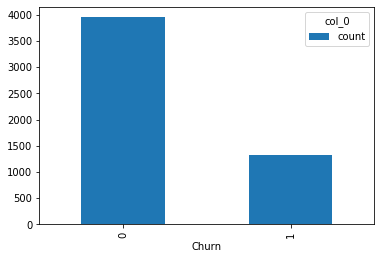

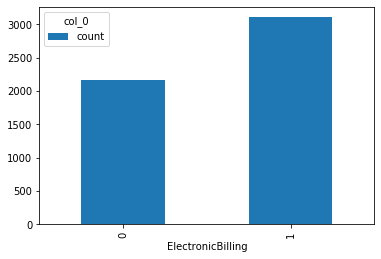

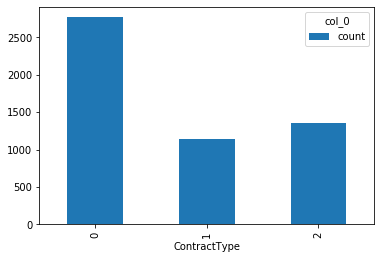

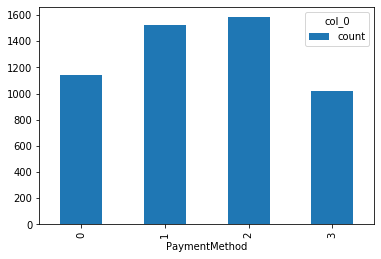

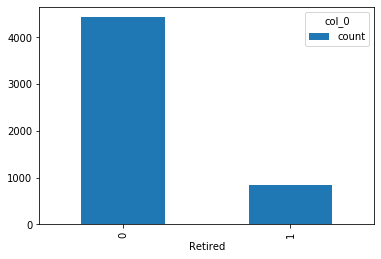

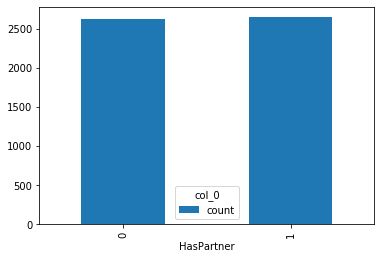

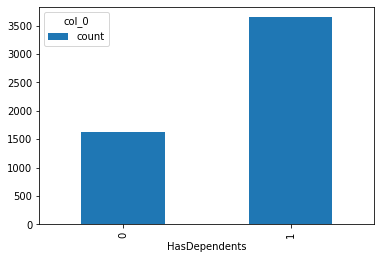

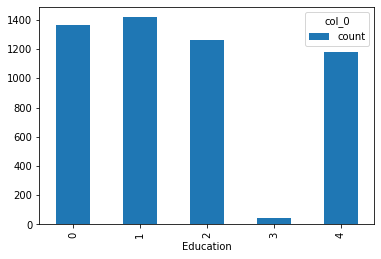

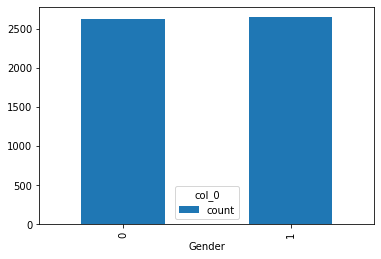

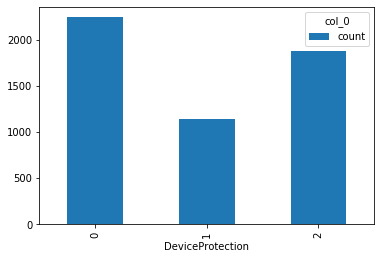

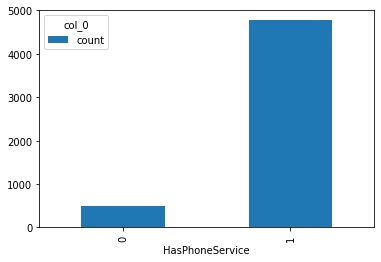

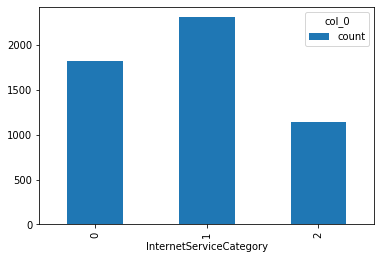

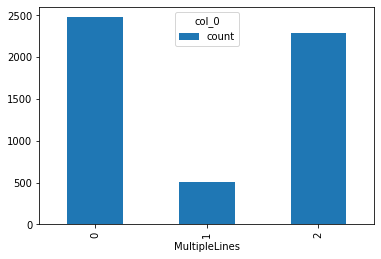

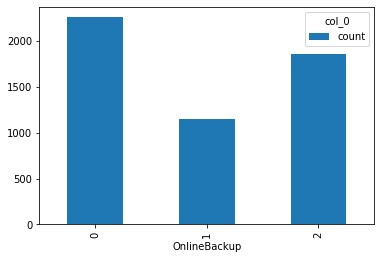

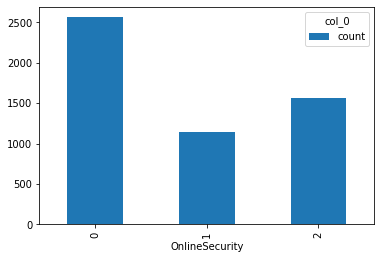

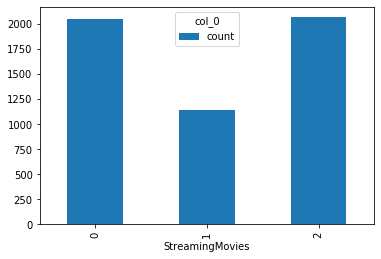

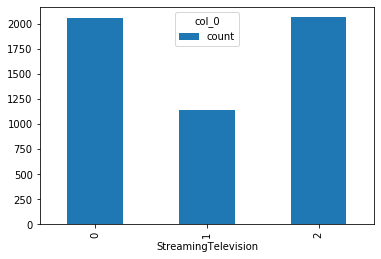

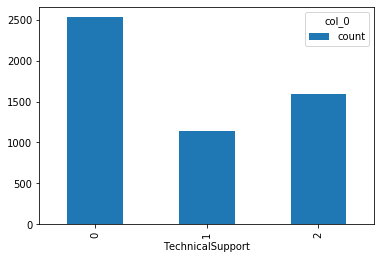

In [108]:
# Plots for categorical attributes
for i in cat:
    pd.crosstab(final[i],columns='count').plot(kind = 'bar')

In [109]:
# Plot for numerical attributes
for i in num:
    final[i] = final[i].astype('int')

BaseCharge plot

Text(0, 0.5, 'frequency')

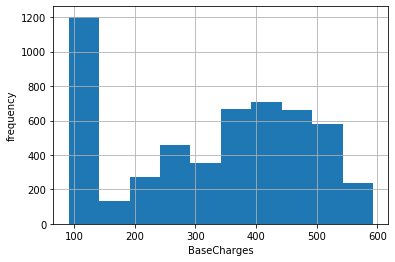

In [110]:
plt.figure()
final.BaseCharges.hist()
plt.xlabel('BaseCharges')
plt.ylabel('frequency')

TotalCharges plot

Text(0, 0.5, 'frequency')

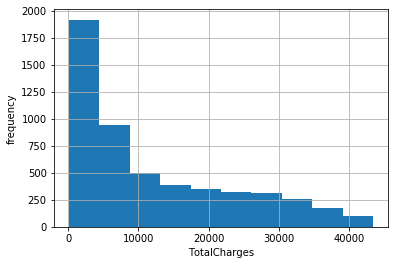

In [111]:
plt.figure()
final.TotalCharges.hist()
plt.xlabel('TotalCharges')
plt.ylabel('frequency')

### Date

In [112]:
import datetime

In [113]:
# Date time format
final.DOC = pd.to_datetime(final.DOC)

In [114]:
final.DOE = pd.to_datetime(final.DOE)

#### Feature Engineering

Here we'll introduce a new useful entry from the existing coloumns (DOE and DOC). Age is the Lifetime of the Customer

In [115]:
final['Age'] = final.DOC - final.DOE

In [116]:
final.Age

0       477 days
1       147 days
2       477 days
3      2217 days
4       147 days
          ...   
5264   1587 days
5265   1947 days
5266    807 days
5267   1137 days
5268   2037 days
Name: Age, Length: 5269, dtype: timedelta64[ns]

We have to keep this in number format

In [117]:
# Converting to int, models does not accept timedelta
final.Age = (final.Age / np.timedelta64(1, 'D')).astype('int')

In [118]:
final.head()

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,...,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport,Age
0,Cust1201,0,478,2012-05-01,5920,2011-01-10,0,1,2,0,...,2,1,1,0,0,0,2,2,0,477
1,Cust1202,0,103,2012-05-01,103,2011-12-06,0,0,2,0,...,1,1,2,0,1,1,1,1,1,147
2,Cust1203,0,399,2012-05-01,5217,2011-01-10,1,0,0,0,...,0,1,1,0,0,0,2,0,0,477
3,Cust1204,0,324,2012-05-01,22757,2006-04-06,0,1,0,0,...,0,1,0,2,2,2,0,0,2,2217
4,Cust1205,1,372,2012-05-01,372,2011-12-06,1,0,2,0,...,0,1,1,2,0,0,0,0,0,147


In [119]:
final.Age.head()

0     477
1     147
2     477
3    2217
4     147
Name: Age, dtype: int32

#### Correlation 

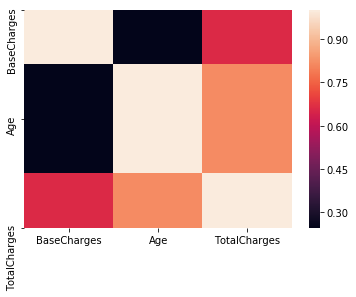

In [120]:
import seaborn as sns 
sns.heatmap(final[['BaseCharges','Age','TotalCharges']].corr())

By the plot, we know that there is a high positive correlation between Age (attribute is derived from DOC and DOE) and Total charges. 

#### Standardization
Age, Base Charges, Total Charges are the numeric attributes in data with different scale. We use standardization techniques to make them in same scale. 

In [121]:
# Numerical variables
num_var = final[['BaseCharges','Age' ]]
num_var.shape

(5269, 2)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [123]:
num_scaled = pd.DataFrame(scaler.fit_transform(num_var),columns=num_var.columns)
num_scaled.head()

,BaseCharges,Age
0,0.770916,0.154930
1,0.023904,0.000000
2,0.613546,0.154930
3,0.464143,0.971831
4,0.559761,0.000000


Dropping all the columns as we already have them

In [124]:
final = final.drop(['TotalCharges','BaseCharges','Age'],1)

Concatenate the BaseCharges and Age column in the final DataFrame

In [125]:
final = pd.concat([num_scaled,final],1)

In [126]:
final.head()

,BaseCharges,Age,CustomerID,Churn,DOC,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.770916,0.154930,Cust1201,0,2012-05-01,2011-01-10,0,1,2,0,...,1,2,1,1,0,0,0,2,2,0
1,0.023904,0.000000,Cust1202,0,2012-05-01,2011-12-06,0,0,2,0,...,1,1,1,2,0,1,1,1,1,1
2,0.613546,0.154930,Cust1203,0,2012-05-01,2011-01-10,1,0,0,0,...,1,0,1,1,0,0,0,2,0,0
3,0.464143,0.971831,Cust1204,0,2012-05-01,2006-04-06,0,1,0,0,...,1,0,1,0,2,2,2,0,0,2
4,0.559761,0.000000,Cust1205,1,2012-05-01,2011-12-06,1,0,2,0,...,0,0,1,1,2,0,0,0,0,0


Show the coloumns

In [127]:
final.columns

Index(['BaseCharges', 'Age', 'CustomerID', 'Churn', 'DOC', 'DOE',
       'ElectronicBilling', 'ContractType', 'PaymentMethod', 'Retired',
       'HasPartner', 'HasDependents', 'Education', 'Gender',
       'DeviceProtection', 'HasPhoneService', 'InternetServiceCategory',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies',
       'StreamingTelevision', 'TechnicalSupport'],
      dtype='object')

Dimensions

In [128]:
final.shape

(5269, 23)

In [129]:
y = final.Churn 
x = final.drop(['Churn','DOC','DOE'],1) 

In [130]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Churn, dtype: category
Categories (2, int64): [0, 1]

In [131]:
x.head()

,BaseCharges,Age,CustomerID,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.770916,0.154930,Cust1201,0,1,2,0,1,1,2,1,2,1,1,0,0,0,2,2,0
1,0.023904,0.000000,Cust1202,0,0,2,0,1,1,4,1,1,1,2,0,1,1,1,1,1
2,0.613546,0.154930,Cust1203,1,0,0,0,1,1,4,1,0,1,1,0,0,0,2,0,0
3,0.464143,0.971831,Cust1204,0,1,0,0,1,0,4,1,0,1,0,2,2,2,0,0,2
4,0.559761,0.000000,Cust1205,1,0,2,0,1,1,4,0,0,1,1,2,0,0,0,0,0


### Train Test Split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,stratify = y,random_state=0)

In [134]:
x_train = xtrain.drop(['CustomerID'],1)
x_test = xtest.drop(['CustomerID'],1)

In [135]:
xtest = xtest.drop(['Retired', 'HasPartner','Gender','Education','InternetServiceCategory','OnlineBackup',
                                    'OnlineSecurity','HasPhoneService','DeviceProtection','MultipleLines','StreamingMovies',
                                    'TechnicalSupport','HasDependents','StreamingTelevision','Age','ElectronicBilling',
                                    'ContractType','PaymentMethod','BaseCharges'],1)

### Model Building

##### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
r = RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='gini',class_weight='balanced',
                           oob_score=True,random_state=20,max_depth=14,max_leaf_nodes=29,min_samples_leaf=6)

In [138]:
r.fit(x_train,ytrain)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=29, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=True,
                       random_state=20, verbose=0, warm_start=False)

In [139]:
r.score(x_train,ytrain)

0.7781995661605207

In [140]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n',confusion_matrix(ytest,r.predict(x_test)))

Confusion Matrix : 
 [[909 276]
 [ 97 299]]


In [141]:
import sklearn.metrics as metrics
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,r.predict(x_test)))
print('Accuracy :',metrics.accuracy_score(ytest,r.predict(x_test)))


 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1185
           1       0.52      0.76      0.62       396

    accuracy                           0.76      1581
   macro avg       0.71      0.76      0.72      1581
weighted avg       0.81      0.76      0.78      1581

Accuracy : 0.7640733712839974


#### Prediction

In [142]:
predicted_res = x_test.copy()
predicted_res['Churn (Predicted)'] = r.predict(x_test)
predicted_res['Churn (Predicted)'].replace((1,0),('Yes','No'),inplace=True)
predicted_res['Churn (Actual)'] = ytest
predicted_res['Churn (Actual)'].replace((1,0),('Yes','No'),inplace=True)

Dropping unwanted columns

In [143]:
predicted_res = predicted_res.drop(['Retired', 'HasPartner','Gender','Education','InternetServiceCategory','OnlineBackup',
                                    'OnlineSecurity','HasPhoneService','DeviceProtection','MultipleLines','StreamingMovies',
                                    'TechnicalSupport','HasDependents','StreamingTelevision','Age','ElectronicBilling',
                                    'ContractType','PaymentMethod','BaseCharges'],1)

In [144]:
predicted_res = pd.concat([xtest,predicted_res],1)
predicted_res.reset_index(drop=True,inplace=True)
predicted_res.head()

,CustomerID,Churn (Predicted),Churn (Actual)
0,Cust5757,No,No
1,Cust4818,No,No
2,Cust5742,Yes,No
3,Cust4679,No,No
4,Cust2862,No,No


In [ ]:
predicted_res.to_csv("prediction_randmfor.csv",index=False)

##### Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(class_weight='balanced',random_state=20,cv = 10,scoring='accuracy',Cs=100)

In [149]:
logreg.fit(x_train,ytrain)

LogisticRegressionCV(Cs=100, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=20, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.0001, verbose=0)

In [150]:
logreg.score(x_train,ytrain)

C:\Users\Favas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.754880694143167

In [151]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n',confusion_matrix(ytest,logreg.predict(x_test)))

Confusion Matrix : 
 [[887 298]
 [103 293]]


In [152]:
import sklearn.metrics as metrics
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,logreg.predict(x_test)))
print('Accuracy :',metrics.accuracy_score(ytest,logreg.predict(x_test)))


 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1185
           1       0.50      0.74      0.59       396

    accuracy                           0.75      1581
   macro avg       0.70      0.74      0.70      1581
weighted avg       0.80      0.75      0.76      1581

Accuracy : 0.7463630613535737


#### Prediction

In [158]:
predicted_res = x_test.copy()
predicted_res['Churn (Predicted)'] = logreg.predict(x_test)
predicted_res['Churn (Predicted)'].replace((1,0),('Yes','No'),inplace=True)
predicted_res['Churn (Actual)'] = ytest
predicted_res['Churn (Actual)'].replace((1,0),('Yes','No'),inplace=True)

Dropping unwanted columns

In [159]:
predicted_res = predicted_res.drop(['Retired', 'HasPartner','Gender','Education','InternetServiceCategory','OnlineBackup',
                                    'OnlineSecurity','HasPhoneService','DeviceProtection','MultipleLines','StreamingMovies',
                                    'TechnicalSupport','HasDependents','StreamingTelevision','Age','ElectronicBilling',
                                    'ContractType','PaymentMethod','BaseCharges'],1)

In [160]:
predicted_res = pd.concat([xtest,predicted_res],1)
predicted_res.reset_index(drop=True,inplace=True)
predicted_res.head()

,CustomerID,Churn (Predicted),Churn (Actual)
0,Cust5757,No,No
1,Cust4818,No,No
2,Cust5742,Yes,No
3,Cust4679,Yes,No
4,Cust2862,No,No


In [161]:
predicted_res['Churn (Predicted)'].value_counts()

No     990
Yes    591
Name: Churn (Predicted), dtype: int64

In [ ]:
predicted_res.to_csv("prediction_logireg.csv",index=False)